### <span style = 'color:green'> Create a machine learning model that can predict the pulser star </span>


**Support Vector Machines(SVM)**
- Support Vector Machines (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

**About the dataset**
- Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.

**Expected output**
- **Missing values should be treated**
- **Perform Standerdisation and handle outliers**
- **perform Support Vector Mchines and tune the model to increase the efficiency of the model**

- For dataset please click here <a href="https://drive.google.com/file/d/19d2ocdl8d5rrE8Wc8nkBTFu_QrgtDt3q/view?usp=sharing
" title="Google Drive">Click here</a>




In [48]:
from sklearn import svm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [49]:
df = pd.read_csv(r'SVM.csv') #reading the data

In [50]:
df.tail(7) #checking the data

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17891,113.210938,42.025039,NaN,0.469897,0.647993,9.051728,21.955583,559.245245,NaN
17892,93.828125,51.244986,0.387653,0.011425,1.926421,19.543869,10.996804,NaN,NaN
17893,116.531250,51.140269,-0.001220,-0.184189,4.510870,26.599514,6.634989,45.362390,NaN
17894,114.976562,53.783052,0.377599,-0.155708,2.772575,20.838488,8.440796,77.355028,NaN
17895,136.171875,48.924385,NaN,0.063227,2.810201,18.695230,7.848577,69.388978,NaN
17896,106.500000,49.066122,0.245742,0.140377,2.331104,15.417568,9.008041,100.367616,NaN
17897,110.679688,38.252642,0.459937,1.690689,4.434783,22.201794,5.939747,39.781374,NaN


In [51]:
df.shape #checking the shape

(17898, 9)

In [52]:
df.info() #checking the data types if possible

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     15396 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        16196 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17029 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


There are four features with nan values in the dataset and maximum are there in the target_class of the datset. And all the dtypes of the featuers are float.

In [53]:
df.isna().sum()#checking for null values

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       2502
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1702
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     869
target_class                                     5370
dtype: int64

In [54]:
5370/17898

0.3000335232986926

As there  are around 5370 missing values in the target_class, we are going to delete those rows as they constitute around 30% of total values. We couldn't impute those rows as they are used for lerning of the model. And also its not a good idea to impute the target and predict the same target.

In [55]:
df.dropna(subset='target_class', inplace= True)

In [56]:
df.shape

(12528, 9)

In [57]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [58]:
df.isna().sum()

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1735
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve          1178
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     625
target_class                                        0
dtype: int64

There are null values in three more rows and lets see how we can deal with them. Before that we have to treat outliers. If we impute the missing data without treating outliers. It may end up with change in the imputing values.

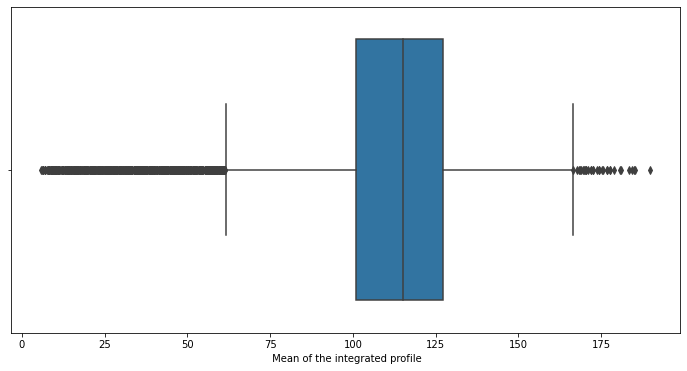

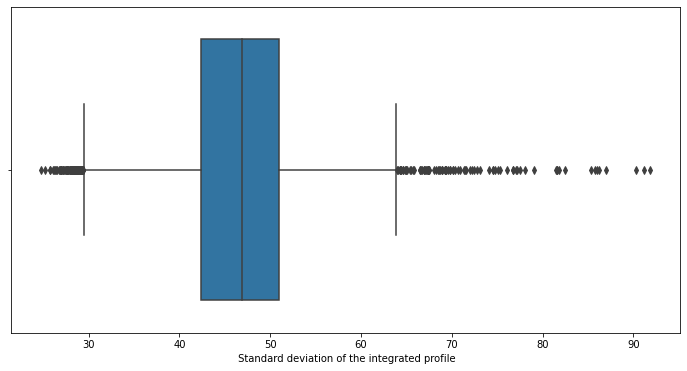

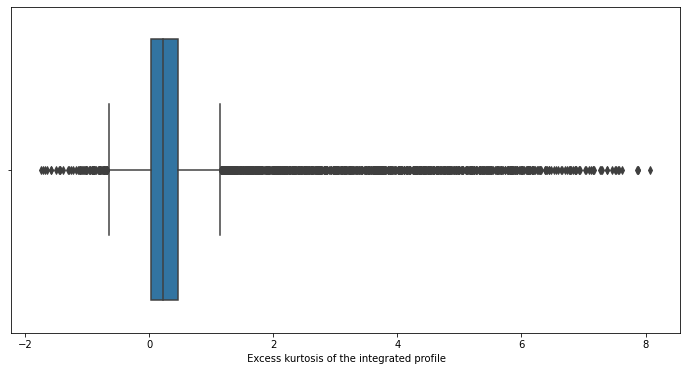

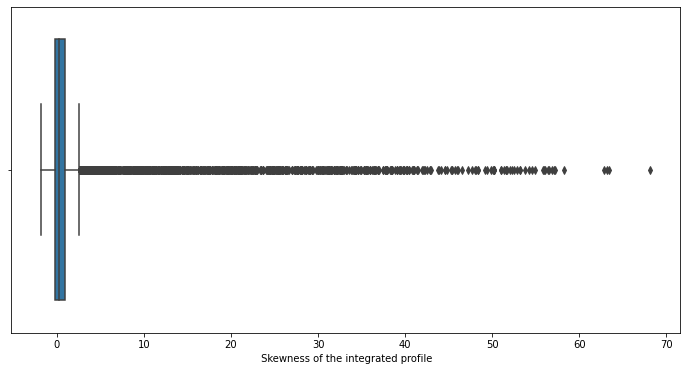

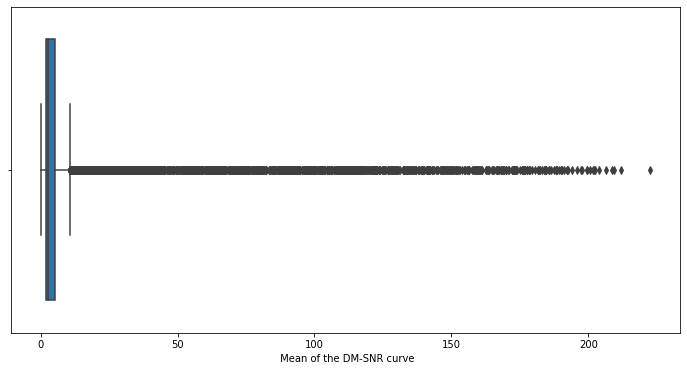

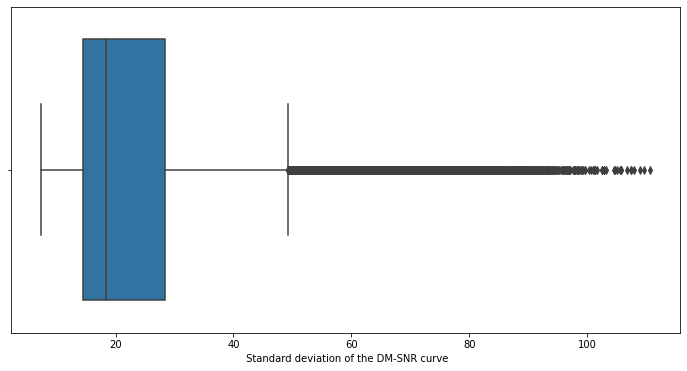

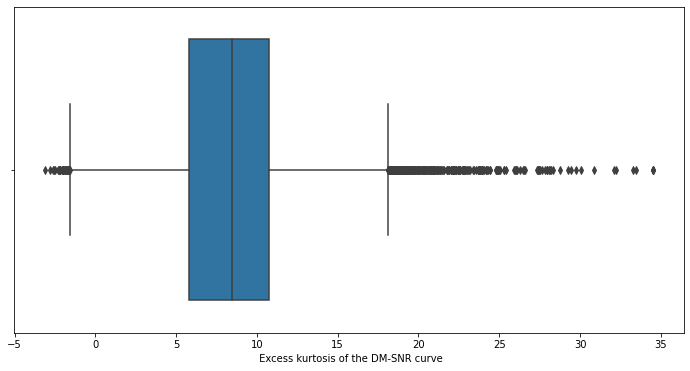

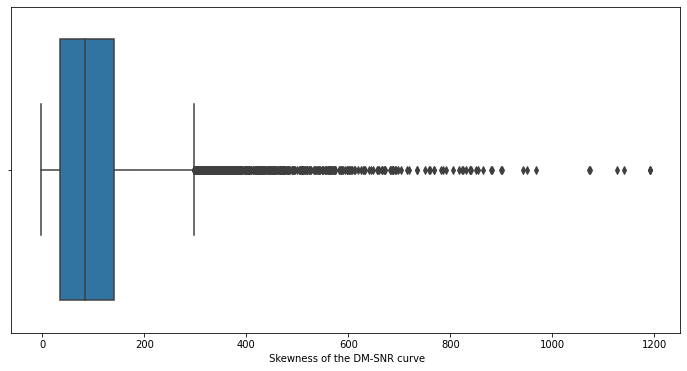

In [59]:
for i in range(len(df.columns) -1):
    plt.figure(figsize= (12, 6))
    sns.boxplot(df[df.columns[i]])

From the above image we can see the outliers in all the features of the data.

In [60]:
# def remove_outlier_IQR(df):
#     Q1=df.quantile(0.25)
#     Q3=df.quantile(0.75)
#     IQR=Q3-Q1
#     df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
#     return df_final
# df = remove_outlier_IQR(df)

____If I remove the outliers it completely removes a class, So I commented the above code and images are just for reference. You can check by uncommenting the above cell.____

In [61]:
df.shape

(12528, 9)

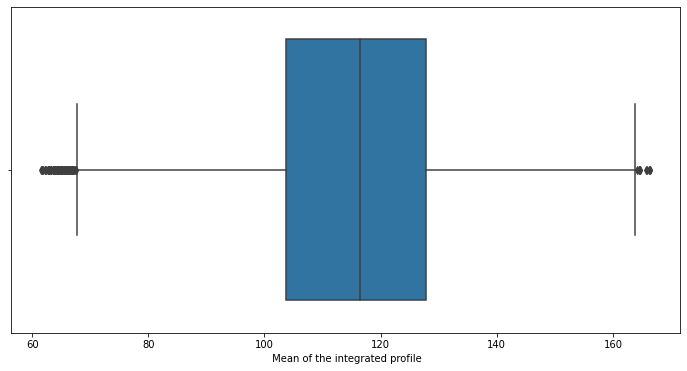

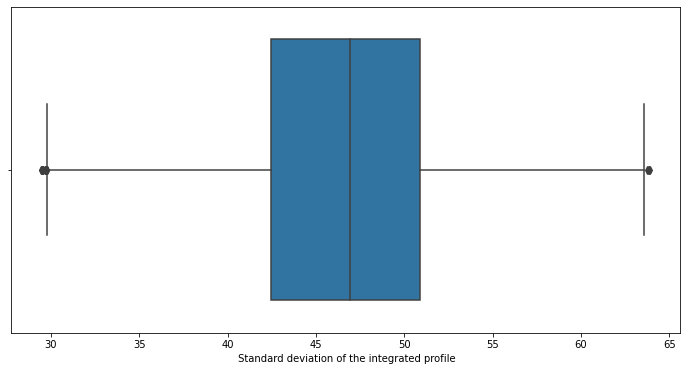

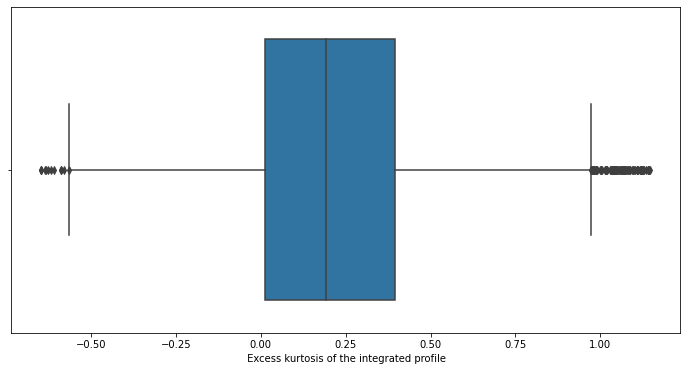

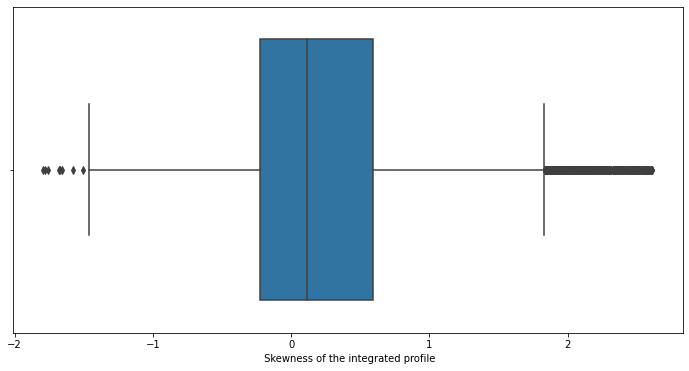

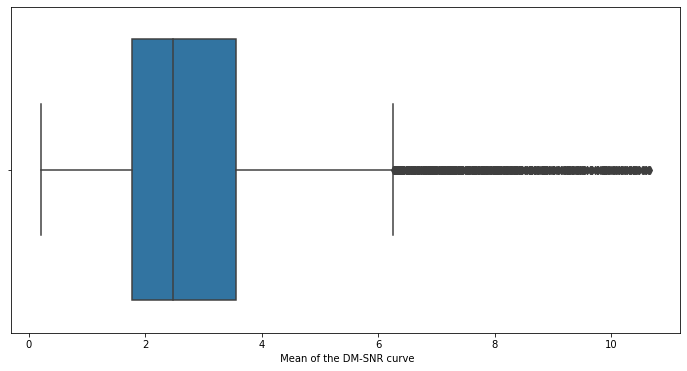

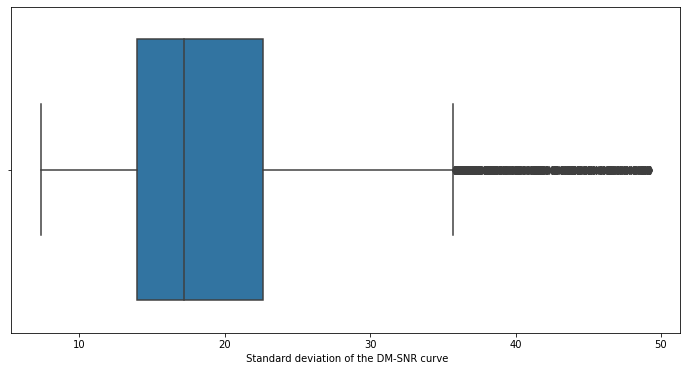

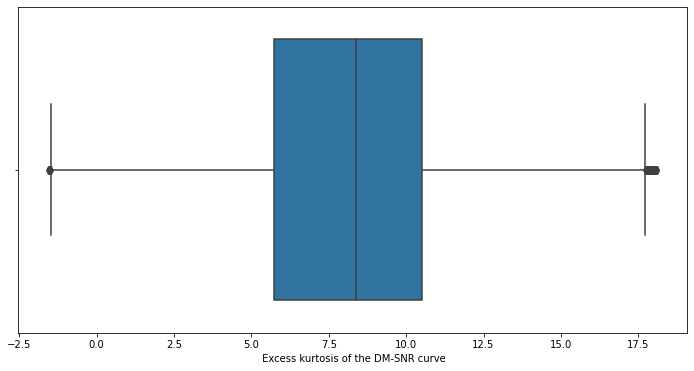

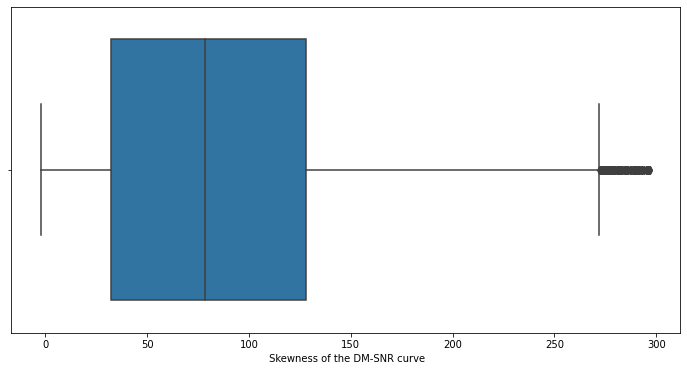

In [260]:
#Presenting the data if outliers are removed
for i in range(len(df.columns) -1):
    plt.figure(figsize= (12, 6))
    sns.boxplot(df[df.columns[i]])

You can now see that lot of the outliers are removed and data is much cleaner

__Let's work on the imputation__

In [62]:
df[' Excess kurtosis of the integrated profile'].head(10) #Checking the data
#df.columns[2]

0    0.375485
1    0.712898
2    0.133408
3   -0.215989
4    0.825013
5    0.229708
6    1.063413
7    0.565106
8    0.347578
9    0.394182
Name:  Excess kurtosis of the integrated profile, dtype: float64

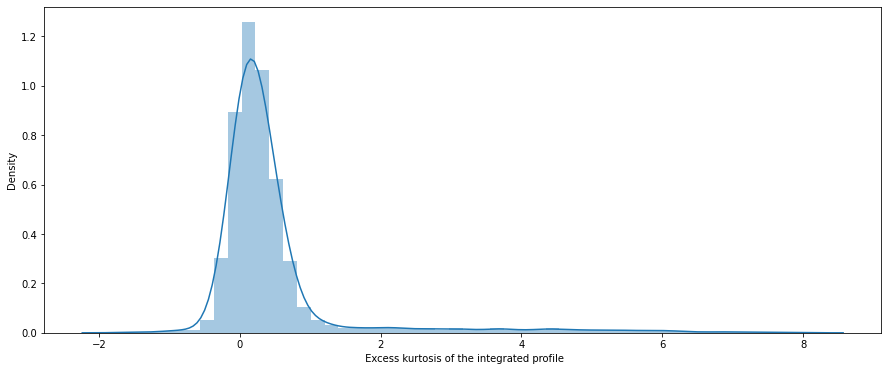

In [63]:
plt.figure(figsize = (15, 6))
sns.distplot(df[' Excess kurtosis of the integrated profile']); #Plotting the Dist plot to check the data shape. If you run the same after removing the outliers, It will be much binomial i.e., normal

From the above image we can easily find that data here is continuous, normal and right skewed data.

__Imputing the missing values:__

In [64]:
df[df[' Excess kurtosis of the integrated profile'].isna()] #the nan values of the column in the daa

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
13,128.734375,48.695560,NaN,0.307803,5.307692,25.162295,5.497544,32.739833,0.0
18,115.781250,53.305713,NaN,-0.518847,3.565217,22.372342,7.740922,65.024844,0.0
37,107.703125,44.726313,NaN,0.390775,2.598662,17.145047,8.498741,85.013918,0.0
51,107.070312,51.695198,NaN,-0.400658,1.832776,17.559706,10.530075,117.131775,0.0
55,120.593750,55.713895,NaN,-0.232142,3.531773,20.847988,8.088508,75.919711,0.0
...,...,...,...,...,...,...,...,...,...
12489,113.812500,49.409284,NaN,0.030844,2.107860,12.690788,10.352528,154.106467,0.0
12492,113.140625,45.938093,NaN,0.576436,2.368729,NaN,9.520229,98.357322,0.0
12496,120.859375,42.477335,NaN,0.902152,3.030100,NaN,8.081578,77.062141,0.0
12504,85.015625,36.717244,NaN,2.503142,3.262542,21.981437,7.249661,54.863037,0.0


In [65]:
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
 
df = pd.DataFrame(imputer.fit_transform(df),columns= df.columns)

#imputing the missing values with the mean as all the columns are numerical

In [66]:
df.isna().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

We can see that there are no null values now.

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     12528 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        12528 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  12528 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [68]:
#splitting the test train data

Xtrain, Xtest, ytrain, ytest = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], train_size = 0.8, random_state = 0)

In [69]:
ypred = svm.LinearSVC(random_state= 20).fit(Xtrain, ytrain).predict(Xtest) #Predicting the data

In [70]:
accuracy_score(ytest, ypred) #checking the accuracy score

0.9712689545091779

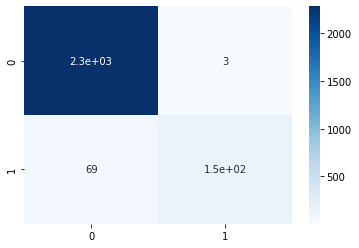

In [71]:
# the confusion matrix
sns.heatmap(confusion_matrix(ytest, ypred), cmap= 'Blues', annot= True);

In [72]:
ypred = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None).fit(Xtrain, ytrain).predict(Xtest) #Predicting the data

In [73]:
accuracy_score(ytest, ypred)

0.9134078212290503

In [74]:
ypred = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=0.1, coef0=0.0, shrinking=True, probability=False,tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, random_state=None).fit(Xtrain, ytrain).predict(Xtest) #Predicting the data

In [75]:
accuracy_score(ytest, ypred)

0.9776536312849162

So, With linear Kernel of the SVM we get 0.6% more accuracy than traditional LinearSVC and almost 6% higher compared to the 'rbf' kernel

In [76]:
recall_score(ytest, ypred)

0.7828054298642534

We got 78% of recall score using this method